## 一、k近邻算法实战之约会网站配对效果判定（手写实现）

### 模块一：准备数据

In [31]:
import numpy as np

In [32]:
fr = open("/Users/liming/Downloads/machinelearninginaction-master/Ch02/datingTestSet.txt")
#读取文件所有内容
arrayOLines = fr.readlines()
#得到文件行数
numberOfLines = len(arrayOLines)
#返回的NumPy矩阵,解析完成的数据:numberOfLines行,3列
datingDataMat = np.zeros((numberOfLines,3))
#返回的分类标签向量
datingLabels = []
#行的索引值
index = 0
for line in arrayOLines:
    #s.strip(rm)，当rm空时,默认删除空白符(包括'\n','\r','\t',' ')
    line = line.strip()
    #使用s.split(str="",num=string,cout(str))将字符串根据'\t'分隔符进行切片。
    listFromLine = line.split('\t')
    #将数据前三列提取出来,存放到returnMat的NumPy矩阵中,也就是特征矩阵
    datingDataMat[index,:] = listFromLine[0:3]
    #根据文本中标记的喜欢的程度进行分类,1代表不喜欢,2代表魅力一般,3代表极具魅力
    if listFromLine[-1] == 'didntLike':
        datingLabels.append(1)
    elif listFromLine[-1] == 'smallDoses':
        datingLabels.append(2)
    elif listFromLine[-1] == 'largeDoses':
        datingLabels.append(3)
    index += 1
    
print(datingDataMat)
print('-'*50)
print(datingLabels)

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
--------------------------------------------------
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 

可以看到，我们已经顺利导入数据，并对数据进行解析，格式化为分类器需要的数据格式。接着我们需要了解数据的真正含义。可以通过友好、直观的图形化的方式观察数据。

### 模块二：分析数据（数据可视化）

In [33]:
# -*- coding: UTF-8 -*-
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np

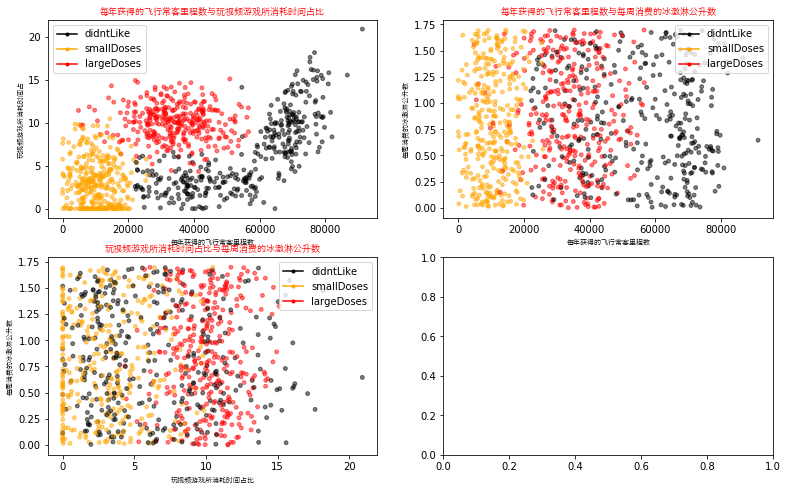

In [34]:
font = FontProperties(fname='/System/Library/Fonts/Hiragino Sans GB.ttc',size=14)
#将fig画布分隔成1行1列,不共享x轴和y轴,fig画布的大小为(13,8)
#当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
fig, axs = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False, figsize=(13,8))
 
numberOfLabels = len(datingLabels)
LabelsColors = []
for i in datingLabels:
    if i == 1:
        LabelsColors.append('black')
    if i == 2:
        LabelsColors.append('orange')
    if i == 3:
        LabelsColors.append('red')
#画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
axs[0][0].scatter(x=datingDataMat[:,0], y=datingDataMat[:,1], color=LabelsColors,s=15, alpha=.5)
#设置标题,x轴label,y轴label
axs0_title_text = axs[0][0].set_title(u'每年获得的飞行常客里程数与玩视频游戏所消耗时间占比',FontProperties=font)
axs0_xlabel_text = axs[0][0].set_xlabel(u'每年获得的飞行常客里程数',FontProperties=font)
axs0_ylabel_text = axs[0][0].set_ylabel(u'玩视频游戏所消耗时间占',FontProperties=font)
plt.setp(axs0_title_text, size=9, weight='bold', color='red') 
plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black') 
plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black')
 
#画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
#设置标题,x轴label,y轴label
axs1_title_text = axs[0][1].set_title(u'每年获得的飞行常客里程数与每周消费的冰激淋公升数',FontProperties=font)
axs1_xlabel_text = axs[0][1].set_xlabel(u'每年获得的飞行常客里程数',FontProperties=font)
axs1_ylabel_text = axs[0][1].set_ylabel(u'每周消费的冰激淋公升数',FontProperties=font)
plt.setp(axs1_title_text, size=9, weight='bold', color='red') 
plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black') 
plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black')
 
#画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
#设置标题,x轴label,y轴label
axs2_title_text = axs[1][0].set_title(u'玩视频游戏所消耗时间占比与每周消费的冰激淋公升数',FontProperties=font)
axs2_xlabel_text = axs[1][0].set_xlabel(u'玩视频游戏所消耗时间占比',FontProperties=font)
axs2_ylabel_text = axs[1][0].set_ylabel(u'每周消费的冰激淋公升数',FontProperties=font)
plt.setp(axs2_title_text, size=9, weight='bold', color='red') 
plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black') 
plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black')
#设置图例
didntLike = mlines.Line2D([], [], color='black', marker='.',markersize=6, label='didntLike')
smallDoses = mlines.Line2D([], [], color='orange', marker='.',markersize=6, label='smallDoses')
largeDoses = mlines.Line2D([], [], color='red', marker='.',markersize=6, label='largeDoses')
#添加图例
axs[0][0].legend(handles=[didntLike,smallDoses,largeDoses])
axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])
#显示图片
plt.show()

通过数据可以很直观的发现数据的规律，比如以玩游戏所消耗时间占比与每年获得的飞行常客里程数，只考虑这二维的特征信息，给我的感觉就是海伦喜欢有生活质量的男人。为什么这么说呢？每年获得的飞行常客里程数表明，海伦喜欢能享受飞行常客奖励计划的男人，但是不能经常坐飞机，疲于奔波，满世界飞。同时，这个男人也要玩视频游戏，并且占一定时间比例。能到处飞，又能经常玩游戏的男人是什么样的男人？很显然，有生活质量，并且生活悠闲的人。我的分析，仅仅是通过可视化的数据总结的个人看法。我想，每个人的感受应该也是不尽相同。

### 模块三：准备数据（数据归一化）

In [35]:
minVals = datingDataMat.min(0)
maxVals = datingDataMat.max(0)
#最大值和最小值的范围
ranges = maxVals - minVals
#shape(datingDataMat)返回datingDataMat的矩阵行列数
normMat = np.zeros(np.shape(datingDataMat))
#返回datingDataMat的行数
m = datingDataMat.shape[0]
#原始值减去最小值
normMat = datingDataMat - np.tile(minVals, (m, 1))
#除以最大和最小值的差,得到归一化数据
normDataSet = normMat / np.tile(ranges, (m, 1))
print(normMat)
print('-'*50)
print(ranges)
print('-'*50)
print(minVals)

[[4.0920000e+04 8.3269760e+00 9.5279600e-01]
 [1.4488000e+04 7.1534690e+00 1.6727480e+00]
 [2.6052000e+04 1.4418710e+00 8.0396800e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6547100e-01]
 [4.8111000e+04 9.1345280e+00 7.2688900e-01]
 [4.3757000e+04 7.8826010e+00 1.3312900e+00]]
--------------------------------------------------
[9.1273000e+04 2.0919349e+01 1.6943610e+00]
--------------------------------------------------
[0.       0.       0.001156]


我们已经顺利将数据归一化了，并且求出了数据的取值范围和数据的最小值，这两个值是在分类的时候需要用到的，直接先求解出来，也算是对数据预处理了。

### 模块四：测试算法（验证分类器）

In [36]:
# -*- coding: UTF-8 -*-
import numpy as np
import operator

In [37]:
def classify0(inX, dataSet, labels, k):
    #numpy函数shape[0]返回dataSet的行数
    dataSetSize = dataSet.shape[0]
    #在列向量方向上重复inX共1次(横向),行向量方向上重复inX共dataSetSize次(纵向)
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    #二维特征相减后平方
    sqDiffMat = diffMat**2
    #sum()所有元素相加,sum(0)列相加,sum(1)行相加
    sqDistances = sqDiffMat.sum(axis=1)
    #开方,计算出距离
    distances = sqDistances**0.5
    #返回distances中元素从小到大排序后的索引值
    sortedDistIndices = distances.argsort()
    #定一个记录类别次数的字典
    classCount = {}
    for i in range(k):
        #取出前k个元素的类别
        voteIlabel = labels[sortedDistIndices[i]]
        #dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值。
        #计算类别次数
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    #python3中用items()替换python2中的iteritems()
    #key=operator.itemgetter(1)根据字典的值进行排序
    #key=operator.itemgetter(0)根据字典的键进行排序
    #reverse降序排序字典
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    #返回次数最多的类别,即所要分类的类别
    return sortedClassCount[0][0]

In [30]:
#取所有数据的百分之十
hoRatio = 0.10
#获得normMat的行数
m = normMat.shape[0]
#百分之十的测试数据的个数
numTestVecs = int(m * hoRatio)
#分类错误计数
errorCount = 0.0
 
for i in range(numTestVecs):
    #前numTestVecs个数据作为测试集,后m-numTestVecs个数据作为训练集
    classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:],datingLabels[numTestVecs:m], 4)
    print("分类结果:%d\t真实类别:%d" % (classifierResult, datingLabels[i]))
    if classifierResult != datingLabels[i]:
        errorCount += 1.0
print("错误率:%f%%" %(errorCount/float(numTestVecs)*100))

分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:1
分类结果:1	真实类别:1
分类结果:3	真实类别:1
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:3	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:3
分类结果:3	真实类别:3
分类结果:3	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:1
分类结果:1	真实类别:1
分类结果:3	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3

In [38]:
#输出结果
resultList = ['讨厌','有些喜欢','非常喜欢']
#三维特征用户输入
precentTats = float(input("玩视频游戏所耗时间百分比:"))
ffMiles = float(input("每年获得的飞行常客里程数:"))
iceCream = float(input("每周消费的冰激淋公升数:"))

#生成NumPy数组,测试集
inArr = np.array([ffMiles, precentTats, iceCream])
#测试集归一化
norminArr = (inArr - minVals) / ranges
#返回分类结果
classifierResult = classify0(norminArr, normMat, datingLabels, 3)
#打印结果
print("你可能%s这个人" % (resultList[classifierResult-1]))

玩视频游戏所耗时间百分比:50
每年获得的飞行常客里程数:50
每周消费的冰激淋公升数:4
你可能有些喜欢这个人


## 二、k近邻算法实战之手写数字识别（sklearn实现）

In [40]:
# -*- coding: UTF-8 -*-
import numpy as np
import operator
from os import listdir
from sklearn.neighbors import KNeighborsClassifier as kNN

In [42]:
def img2vector(filename):
    #创建1x1024零向量
    returnVect = np.zeros((1, 1024))
    #打开文件
    fr = open(filename)
    #按行读取
    for i in range(32):
        #读一行数据
        lineStr = fr.readline()
        #每一行的前32个元素依次添加到returnVect中
        for j in range(32):
            returnVect[0, 32*i+j] = int(lineStr[j])
    #返回转换后的1x1024向量
    return returnVect

In [44]:
hwLabels = []
#返回trainingDigits目录下的文件名
trainingFileList = listdir('/Users/liming/Downloads/machinelearninginaction-master/Ch02/digits/trainingDigits')
#返回文件夹下文件的个数
m = len(trainingFileList)
#初始化训练的Mat矩阵,测试集
trainingMat = np.zeros((m, 1024))
#从文件名中解析出训练集的类别
for i in range(m):
    #获得文件的名字
    fileNameStr = trainingFileList[i]
    #获得分类的数字
    classNumber = int(fileNameStr.split('_')[0])
    #将获得的类别添加到hwLabels中
    hwLabels.append(classNumber)
    #将每一个文件的1x1024数据存储到trainingMat矩阵中
    trainingMat[i,:] = img2vector('/Users/liming/Downloads/machinelearninginaction-master/Ch02/digits/trainingDigits/%s' % (fileNameStr))
#构建kNN分类器
neigh = kNN(n_neighbors = 3, algorithm = 'auto')
#拟合模型, trainingMat为训练矩阵,hwLabels为对应的标签
neigh.fit(trainingMat, hwLabels)
#返回testDigits目录下的文件列表
testFileList = listdir('/Users/liming/Downloads/machinelearninginaction-master/Ch02/digits/testDigits')
#错误检测计数
errorCount = 0.0
#测试数据的数量
mTest = len(testFileList)
#从文件中解析出测试集的类别并进行分类测试
for i in range(mTest):
    #获得文件的名字
    fileNameStr = testFileList[i]
    #获得分类的数字
    classNumber = int(fileNameStr.split('_')[0])
    #获得测试集的1x1024向量,用于训练
    vectorUnderTest = img2vector('/Users/liming/Downloads/machinelearninginaction-master/Ch02/digits/testDigits/%s' % (fileNameStr))
    #获得预测结果
    # classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
    classifierResult = neigh.predict(vectorUnderTest)
    print("分类返回结果为%d\t真实结果为%d" % (classifierResult, classNumber))
    if(classifierResult != classNumber):
        errorCount += 1.0
print("总共错了%d个数据\n错误率为%f%%" % (errorCount, errorCount/mTest * 100))

分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为9	真实结果为9
分类返回结果为7	真实结果为7
分类返回结果为7	真实结果为7
分类返回结果为0	真实结果为0
分类返回结果为3	真实结果为3
分类返回结果为2	真实结果为2
分类返回结果为2	真实结果为2
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为2
分类返回结果为6	真实结果为6
分类返回结果为6	真实结果为6
分类返回结果为9	真实结果为9
分类返回结果为8	真实结果为8
分类返回结果为1	真实结果为8
分类返回结果为1	真实结果为1
分类返回结果为8	真实结果为8
分类返回结果为1	真实结果为1
分类返回结果为3	真实结果为8
分类返回结果为9	真实结果为9
分类返回结果为6	真实结果为6
分类返回结果为6	真实结果为6
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为2
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为2
分类返回结果为2	真实结果为2
分类返回结果为9	真实结果为9
分类返回结果为3	真实结果为3
分类返回结果为0	真实结果为0
分类返回结果为7	真实结果为7
分类返回结果为7	真实结果为7
分类返回结果为0	真实结果为0
分类返回结果为9	真实结果为9
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为3	真实结果为3
分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为1	真实结果为1
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为7	真实结果为7
分类返回结果为9	真实结果为9
分类返回结果为7	真实结果为7
分类返回结果为0	真实结果为0
分类返回结果为7	真实结果为7
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为2

分类返回结果为0	真实结果为0
分类返回结果为9	真实结果为9
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为6	真实结果为6
分类返回结果为3	真实结果为3
分类返回结果为3	真实结果为3
分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为3	真实结果为3
分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为6	真实结果为6
分类返回结果为7	真实结果为7
分类返回结果为7	真实结果为7
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为9	真实结果为9
分类返回结果为4	真实结果为4
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为2
分类返回结果为2	真实结果为2
分类返回结果为1	真实结果为1
分类返回结果为8	真实结果为8
分类返回结果为8	真实结果为8
分类返回结果为1	真实结果为1
分类返回结果为6	真实结果为6
分类返回结果为6	真实结果为6
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为6	真实结果为6
分类返回结果为6	真实结果为6
分类返回结果为8	真实结果为8
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为8	真实结果为8
分类返回结果为2	真实结果为2
分类返回结果为2	真实结果为2
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为4	真实结果为4
分类返回结果为0	真实结果为0
分类返回结果为9	真实结果为9
分类返回结果为9	真实结果为9
分类返回结果为7	真实结果为7
分类返回结果为7	真实结果为7
分类返回结果为6	真实结果为6
分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为3	真实结果为3
分类返回结果为3	真实结果为3
分类返回结果为3	真实结果为3
分类返回结果为4

上述代码使用的algorithm参数是auto，更改algorithm参数为brute，使用暴力搜索，你会发现，运行时间变长了，变为10s+。更改n_neighbors参数，你会发现，不同的值，检测精度也是不同的。自己可以尝试更改这些参数的设置，加深对其函数的理解。